## IBM Course 
##### Section Two : Linear Regression 

In [2]:
##Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [4]:
##Louading Boston Dataset
from helper import boston_dataframe
boston_data = boston_dataframe()
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


##### Determining Normality 
* There are different ways to test whether variable has normal distribution, In this course they teach me two ways (Visually & Statitically ) that can tell that our target variable is normaly distributed.
* If our target valuable is not normally distributed we can apply transformations and fit our regression model  to predict the transformation variable 

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

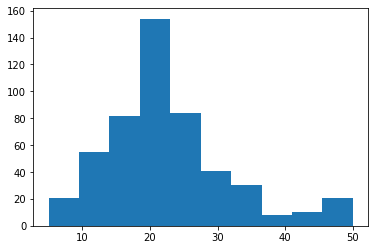

In [6]:
## Histograms 
# The histogram is a data visualization that shows the distribution of a variable. 

data = boston_data['MEDV']
plt.hist(data)

* Doesn't look normaly distrbitued due to the right tail , let's try in statitical way 

In [9]:
from scipy.stats.mstats import normaltest
normaltest(boston_data['MEDV'])
##p-value _extremely_ low. Our target variable we've been dealing with this whole time was not normally distributed!

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

#### Testing Log
The log transform can transform data that is significantly skewed right to be more normally distributed:

In [12]:
## Let's apply log transform in our target variable 
log_transform =np.log(data)

(array([  3.,   8.,  13.,  23.,  63., 100., 172.,  52.,  40.,  32.]),
 array([1.60943791, 1.83969642, 2.06995493, 2.30021344, 2.53047195,
        2.76073046, 2.99098897, 3.22124748, 3.45150599, 3.6817645 ,
        3.91202301]),
 <BarContainer object of 10 artists>)

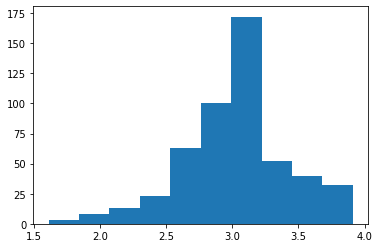

In [13]:
## plot 
plt.hist(log_transform)

In [14]:
## in statitical way 
from scipy.stats.mstats import normaltest
normaltest(log_transform)
##Closer but still not normal  !

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

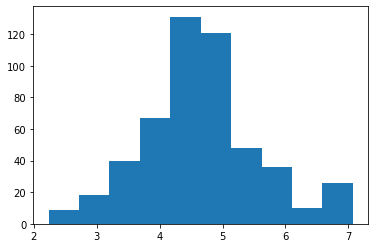

In [16]:
sqr_root_transformer = np.sqrt(data)
plt.hist(sqr_root_transformer)

In [17]:
##statitically 
from scipy.stats.mstats import normaltest
normaltest(sqr_root_transformer)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

#### Box Cox
The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [22]:
from scipy.stats import boxcox
bc_result  = boxcox(data)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [24]:
lam

0.2166209012915364

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

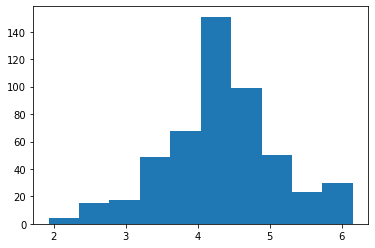

In [26]:
##ploting boxcox histogram 
plt.hist(boxcox_medv)

In [28]:
##statically 
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

#### Testing Regression 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
bost_copydata =boston_dataframe()

In [39]:
##target variable 
Y= 'MEDV'

##features 
x = bost_copydata.drop(Y,axis=1)
Y = bost_copydata[Y]

In [40]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [41]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [44]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_pf,Y,test_size=0.3, 
                                                    random_state=72018)

In [50]:
##Standarscale on X_train 
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s.shape

(354, 104)

In [55]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [57]:
##fiting the regression 
lr = lr.fit(X_train_s,y_train_bc)
X_test_s = s.fit_transform(X_test)
pred = lr.predict(X_test_s)